<br>
<h1 style = "font-size:50px; font-family:Helvetica ; font-weight : normal; color : #fe346e; text-align: center;"> Exploratory Data Analysis</h1>
<h2 style = "font-size:40px; font-family:Helvetica ; font-weight : normal; text-align: center;"> Introduction to Pandas </h2>
<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612126/EDA/dw1xwbh1g2c85izletjs.png' width="200"  style="float:center" align="center"/>

<br>

<div style='padding:15px'>
<a href="https://colab.research.google.com/github/rribeiro-sci/EDA_laboratory/blob/main/3-Dimensional_Reduction.ipynb" target="_blank">
<img alt="Colab" src="https://res.cloudinary.com/djz27k5hg/image/upload/v1637335713/badges/colab-badge_hh0uyl.svg" height="25" style="margin:20px">
</a>

</div

Dimensionality Reduction techniques play a crucial role in simplifying complex datasets while preserving essential information. In this tutorial, we will explore the following techniques, understand their principles, and learn how to implement them using Python:

* **Principal Component Analysis (PCA)**
* **Linear Discriminant Analysis (LDA)**
* **t-Distributed Stochastic Neighbor Embedding (t-SNE)**


In this tutorial we will use the Iris Dataset. This is the gold-standard benchmark dataset in the field of machine learning, and is often used for demonstrating various algorithms and techniques. It consists of measurements of four features:

* sepal length 
* sepal width 
* petal length
* petal width

of three species of iris flowers: Setosa, Versicolor, and Virginica. 

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/hgt6fcp5o6lrfnliqlfr.jpg' width="300" style="float:center" />

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612125/EDA/t7sfxggoz9mzozahhrsn.png' width="900" style="float:center" />



In [1]:
# Importing libraries
from sklearn import datasets

# importing iris dataset
iris = datasets.load_iris()

**How does the dataset looks like?**

In [2]:
#iris.data
#iris.feature_names
#iris.target_names

we can create a dataframe from data

In [3]:
# importing libraries
import pandas as pd

# loading iris dataset into a dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [4]:
import numpy as np

# creating the column "species"
iris_df['species']=np.array([iris.target_names[val] for val in iris.target])

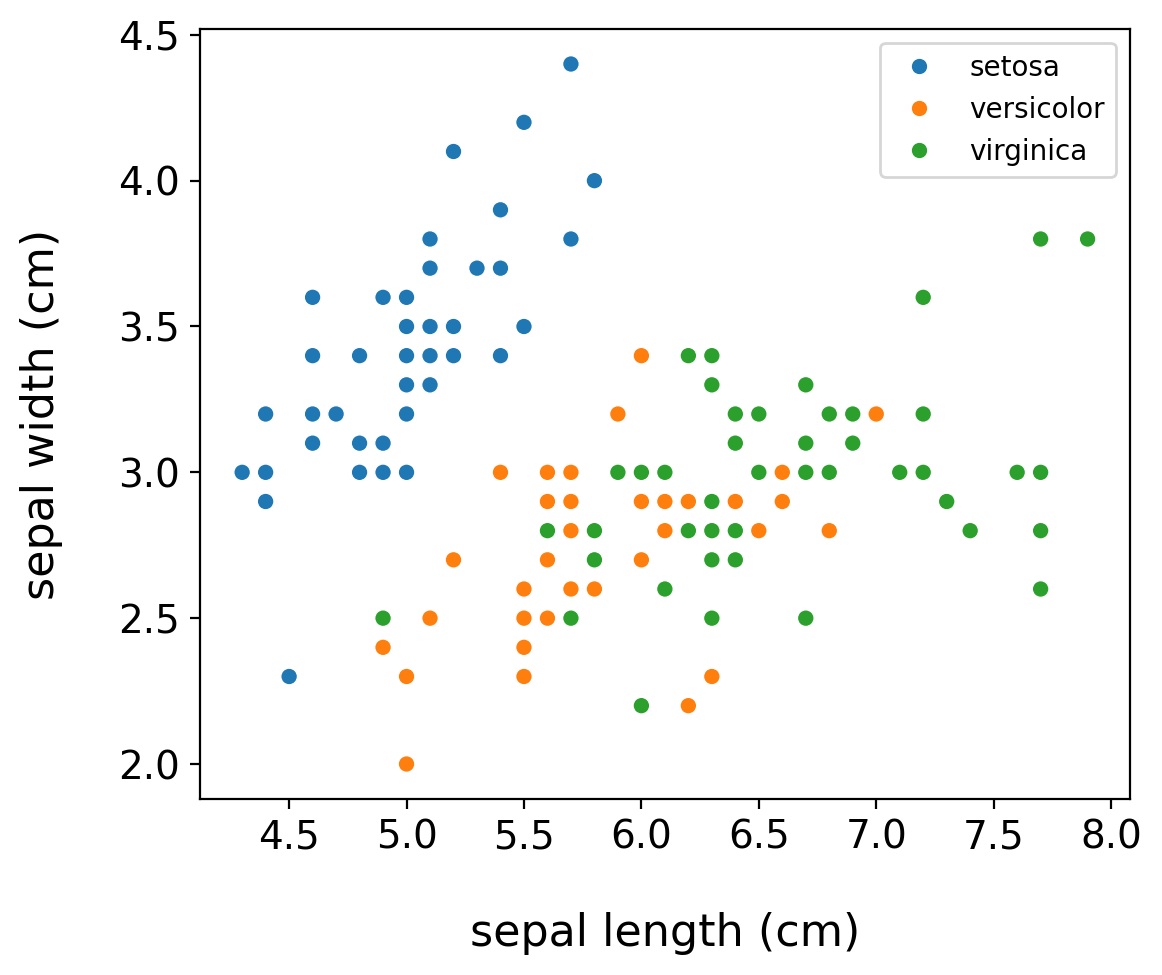

In [5]:
# importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# setting jupyter plotting parameters
%config InlineBackend.figure_format ='retina'
%matplotlib inline


## Ploting two features

fig, ax = plt.subplots(figsize=[6,5])
#plt.figure(figsize=(6,5))

sns.scatterplot(data =iris_df,
                x='sepal length (cm)', 
                y='sepal width (cm)',
                hue='species', 
                palette='tab10', legend='full');

# Legend
plt.legend(title='')

#styling
plt.xlabel('sepal length (cm)', fontsize=16, labelpad=20)
plt.ylabel('sepal width (cm)', fontsize=16, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


<Figure size 300x300 with 0 Axes>

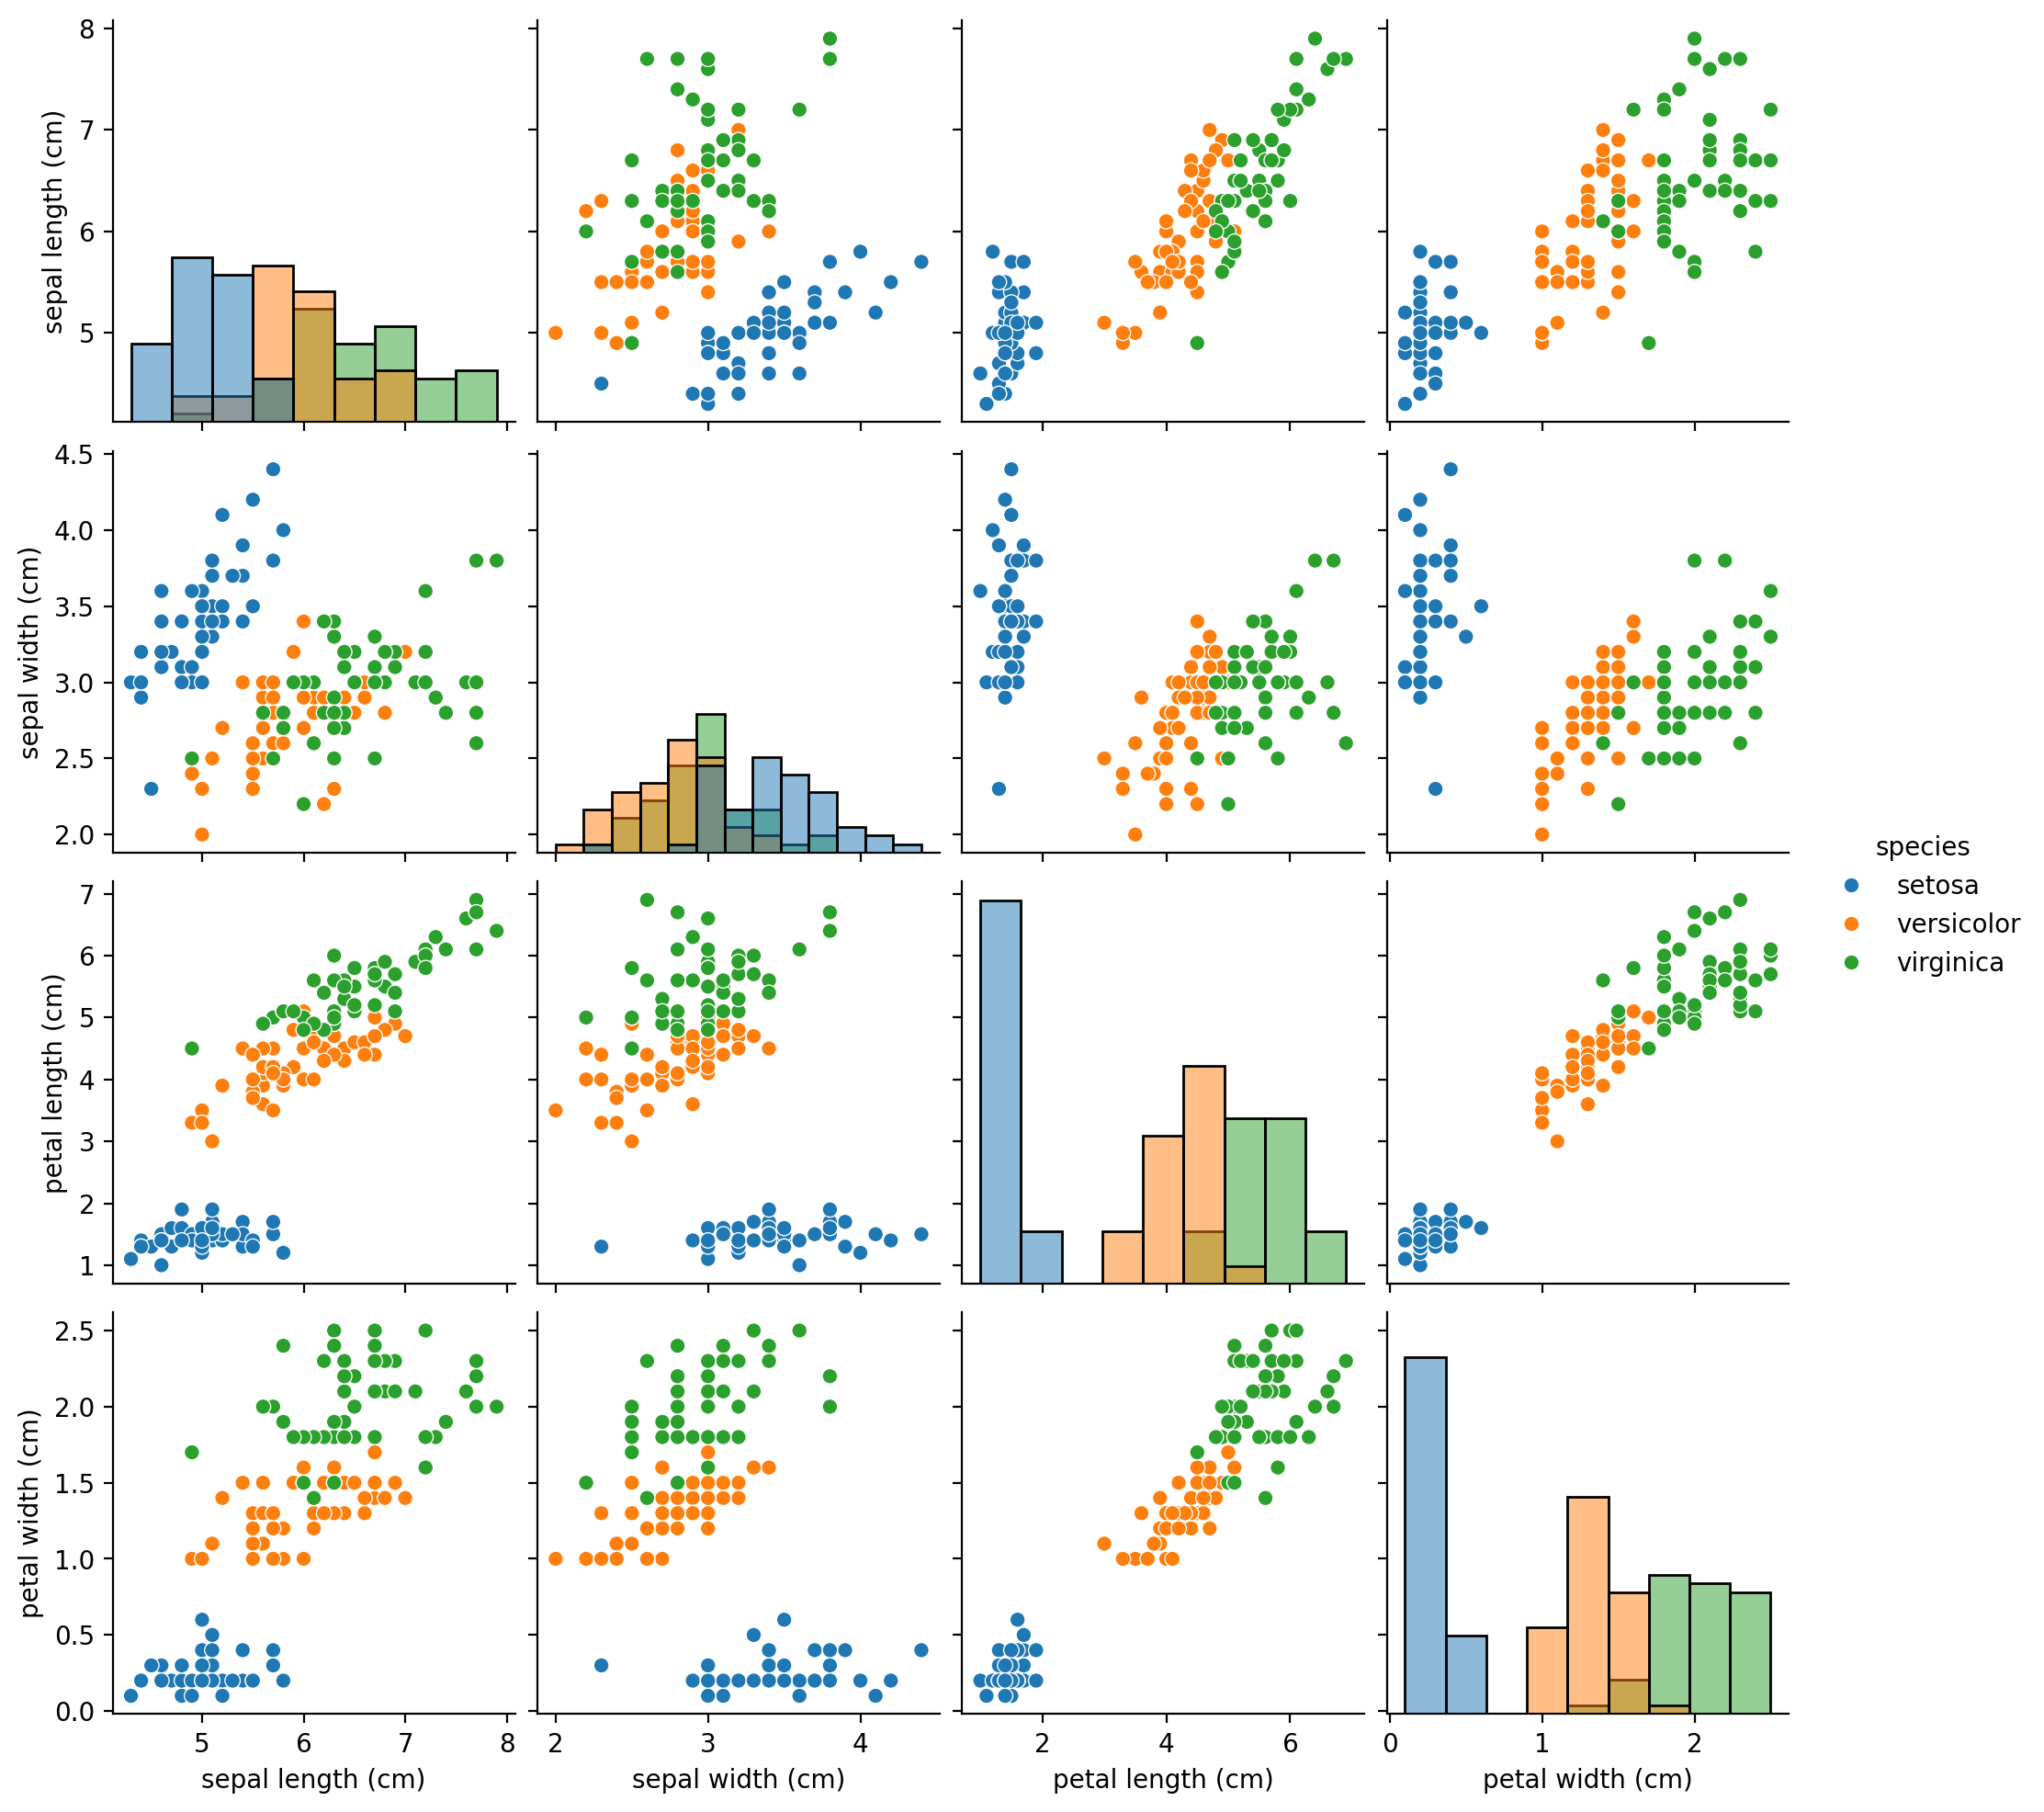

In [6]:
plt.figure(figsize=(3,3))
sns.pairplot(iris_df, hue='species',diag_kind="hist");
plt.show()

### **Is there a way of taking into account all variables?**

An amazing solution if the _**P**rinciple **C**omponent **A**nalysis_ (**PCA**). PCA takes all variables of the dataset and combines them producing new factors called _**P**inciple **C**omponents_ (**PC**). And it does in such a way that PCs keep most of the information of the dataset.

To not overvalue those dimensions with the highest numerical values we need to normalize and center the values of every input dimenison before applying the PCA.


In [7]:
from sklearn.preprocessing import StandardScaler # for data standardization

# Get scaler
scaler=StandardScaler()
# Perform standard scaling on model features
X=scaler.fit_transform(iris.data)

In [8]:
# importing libraries
from sklearn.decomposition import PCA

# Creating a PCA instance
pca = PCA()

'''Here we can explain the n_components. we can choose the number of components or the % threshold''';

In [9]:
# Training the PCA model with our data
pca.fit(X);

When you call the fit() method on the PCA object, you're essentially training the PCA model on your dataset. During this process, PCA analyzes the structure of your data and computes the principal components. These principal components are the new orthogonal axes in the feature space that capture the directions of maximum variance in the data.

Here's what happens in detail:

- The PCA algorithm calculates the mean of each feature in your dataset.
- It then centers the data by subtracting the mean from each feature. This step ensures that the principal components are not biased towards any particular feature.
- Next, PCA computes the covariance matrix of the centered data. The covariance matrix describes the relationships between the different features in your dataset.
- Finally, PCA performs eigendecomposition on the covariance matrix to extract the principal components.

In [10]:
"""We can see what is inside""";
pca.__dict__;

The next step is projecting the original data points onto the new principal component axes. To do that with the `transform()` method.

In [11]:
# Applying transformation
iris_pca = pca.transform(X)

We can now plot the new values

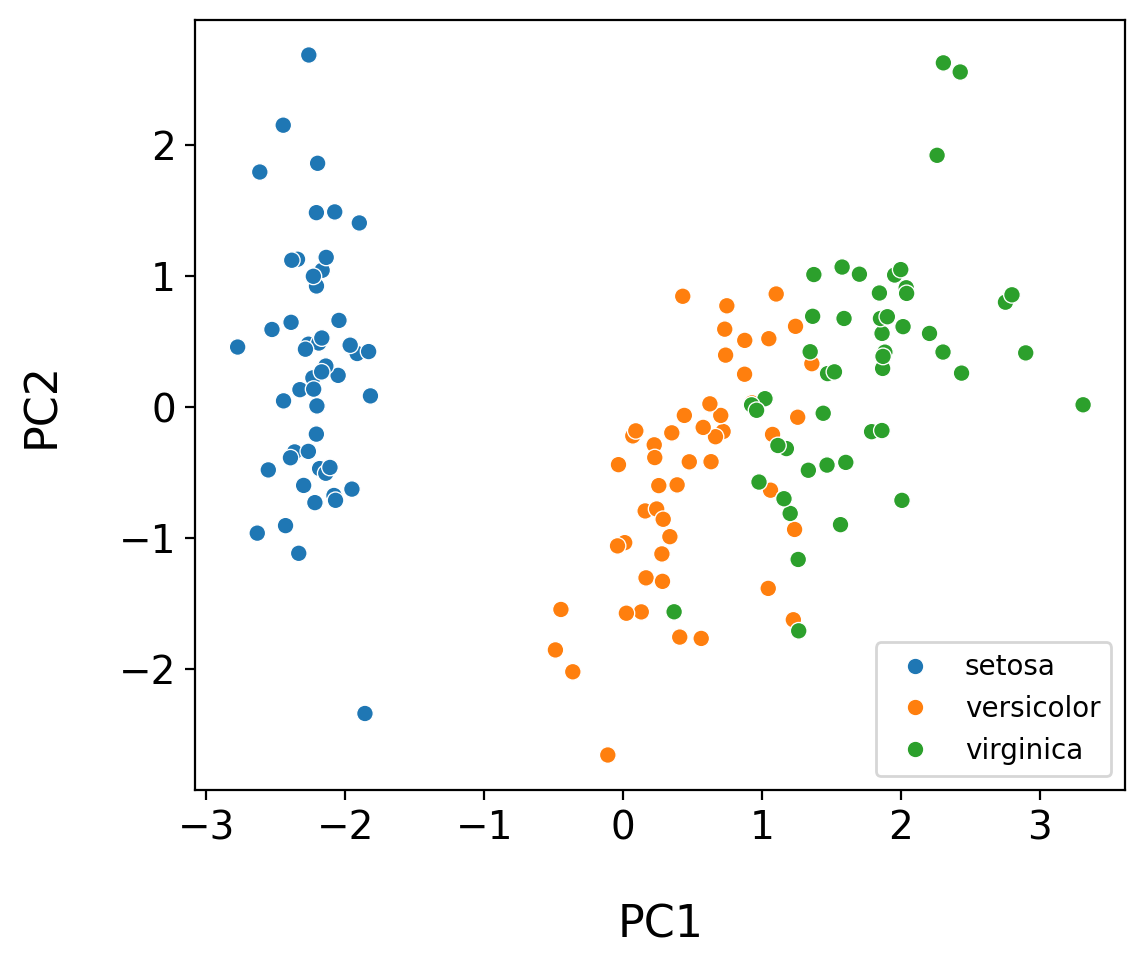

In [12]:
## Ploting two features

fig, ax = plt.subplots(figsize=[6,5])

sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris_df.species)

# Legend
plt.legend(title='')

#styling
plt.xlabel('PC1', fontsize=16, labelpad=20)
plt.ylabel('PC2', fontsize=16, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### How about the other PCs?
* **How many PC should be calculated?**
* **How do we know if the first two principal components are enough to capture most of the information or variance in the dataset?**

The **Scree Plot** tells us how much variance of the dataset is explained by each PC.

In [13]:
print(pca.explained_variance_ratio_*100)

[72.96244541 22.85076179  3.66892189  0.51787091]


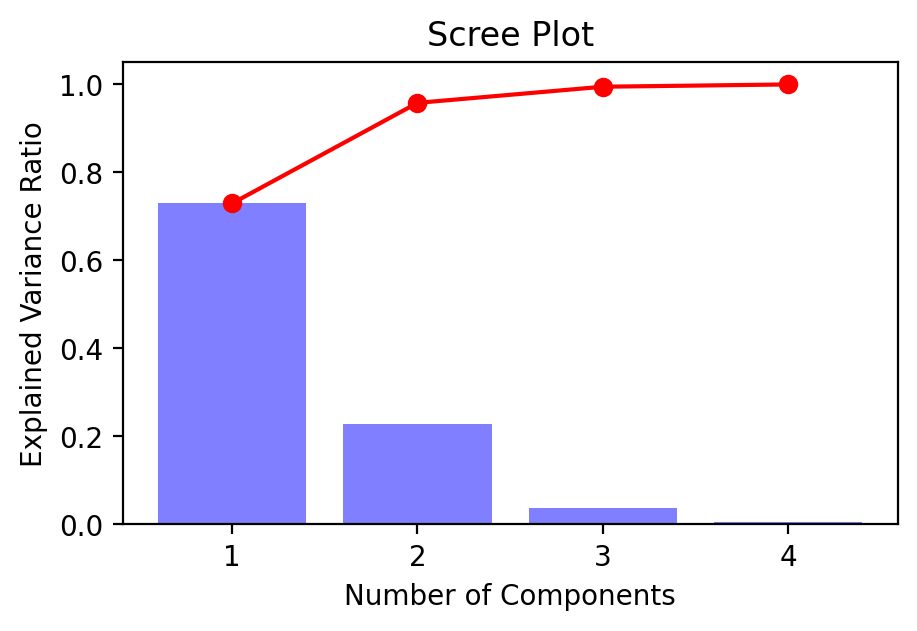

In [14]:
# Visualizing scree plot
plt.figure(figsize=(5, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b', alpha=0.5, align='center')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), color='r', marker='o', linestyle='-')

#Styling
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(False)
plt.show()

Ideally, we want to get around 90% variance with just 2 to 3 PCs to retain enough information while we can still visualize our data on a plot.

### **But was it exactly PC1 and PC2? What does that mean?**

We are interested in which factors of our dataset contribute to the PCs. And how variables are correlated. This is given by the principal components **LOADINGS**. Basically, each variable gets a loading (or weight) for each PC, which tells us how much it contributes to that PC. We can also plot the loadings to see the relationship between the variables. 

Essentially, PC **LOADINGS**, let us know:
- Which variables are influential
- How variables are correlated

In [15]:
# Geting loadings
loadings = pca.components_

In [16]:
loadings

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

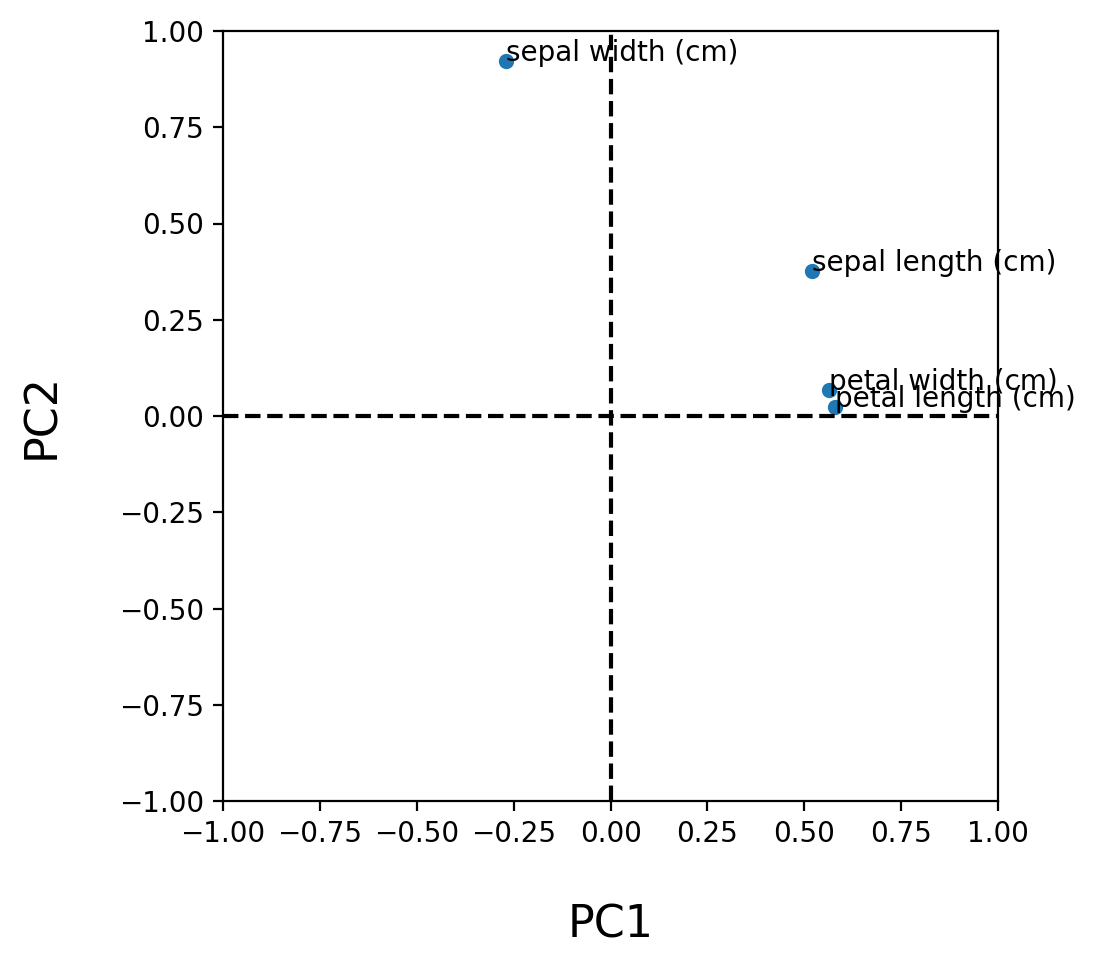

In [17]:
plt.figure(figsize=(5, 5))

sns.scatterplot(x=loadings[0], y=loadings[1] )
plt.ylim([-1,1])
plt.xlim([-1,1])

# Styling 
plt.xlabel('PC1', fontsize=16, labelpad=20)
plt.ylabel('PC2', fontsize=16, labelpad=20)
# Annotate each point with its name
for i, name in enumerate(iris.feature_names):
    plt.annotate(name, (loadings[0][i], loadings[1][i]))

plt.axvline(0, c='black', ls='--') # adding vertical line in data co-ordinates
plt.axhline(0, c='black', ls='--') # adding horizontal line in data co-ordinates

plt.show()

In [18]:
iris_df.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Magnitude of Loading Values:** The loading values indicate the strength of the relationship between each variable and each principal component. Higher absolute values suggest a stronger relationship.

**Direction of Loading Values:** The direction of the loading values indicates the correlation between variables and principal components. Variables pointing in the same direction have a positive correlation with each other, while those pointing in opposite directions have a negative correlation.

**Proximity of Variables:** Variables that are close together in the plot have similar patterns of variation across observations. Variables far apart have dissimilar patterns.


#### How to interpret the PCA plot?

In a PCA plot:
* Each dot represents an entry in the dataset.
* Entries with similar feature profiles cluster together.
* PC1 > PC2 in describing data.



Looking at the PCA plot (example) below:
* Three distinct clusters of entries are evident.
* Orange and green clusters differ along PC1.
* Pink and green clusters differ along PC2.
* Greater difference along PC1 axis between green and orange clusters than along PC2 axis between pink and green clusters.

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/hnsml2bkszm9jkuafytd.png' width="800" style="float:center" />



### Linear Desctiminant Analysis

PCA reduces dimensions by focusing on features with the most variation. However, in this case we are more interested in maximizing the separability between the 3 species. **Linear Discriminant Analysis** (LDA) is similar to PCA: it reduce dimentions but focus on **maximizing the separability among categories**.




In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [20]:
lda.fit(X, iris.target) # in this case we also need to include categories because LDA is a supervised dimensionality reduction.

irislda = lda.transform(X)


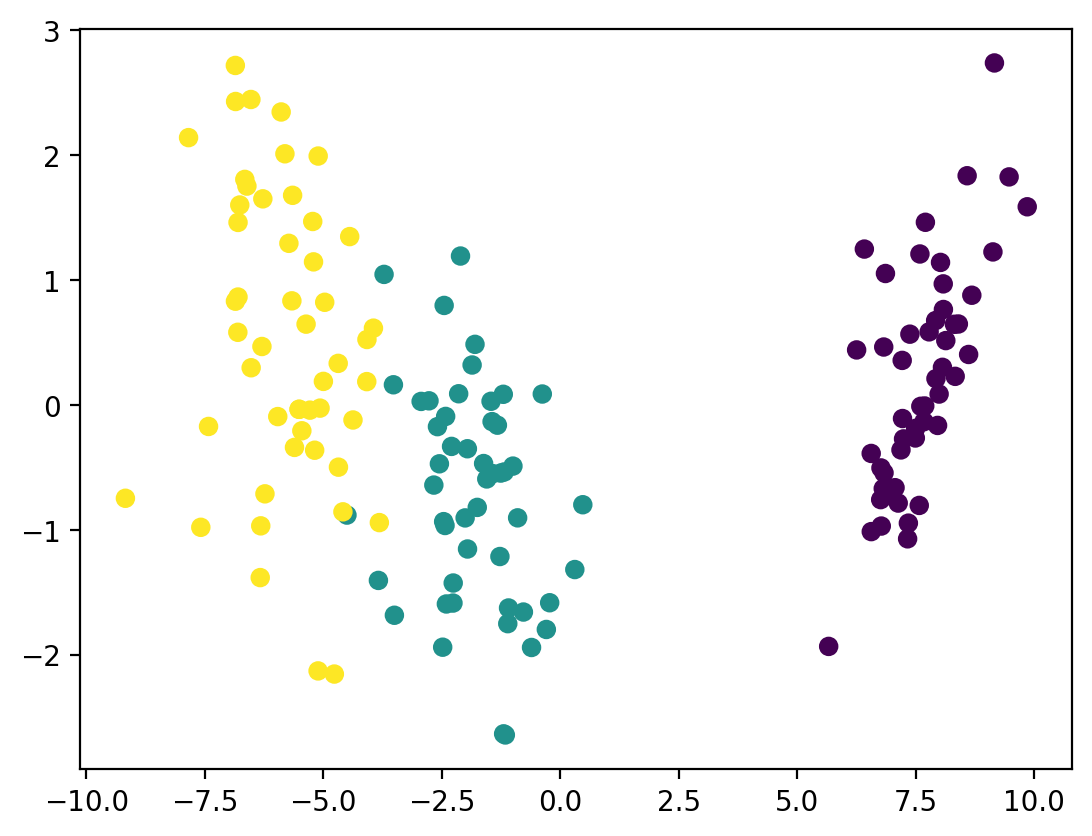

In [21]:
plt.scatter(irislda[:,0], irislda[:,1], c=iris.target)

In [22]:
import seaborn as sns

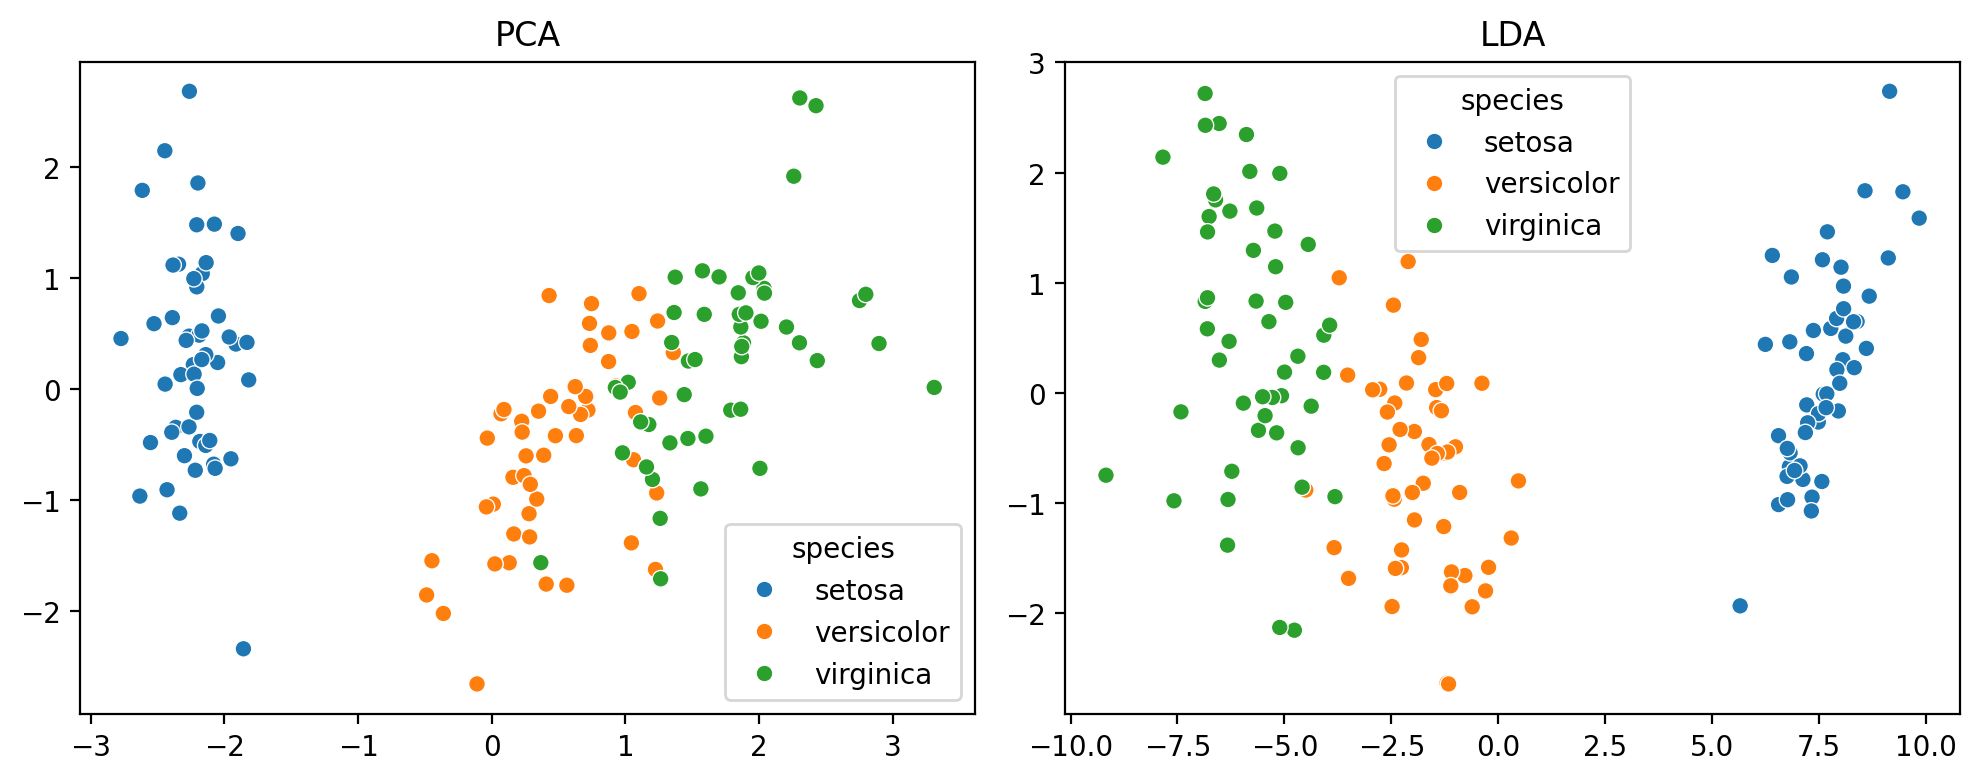

In [25]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])


#ax1.scatter(irislda[:,0], irislda[:,1], c=iris.target)

# Plot data1 on the first subplot
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris_df.species, ax=ax1)
ax1.set_title('PCA')

# Plot data2 on the second subplot
sns.scatterplot(x=irislda[:, 0], y=irislda[:, 1], hue= iris_df.species, ax=ax2)
ax2.set_title('LDA')

# Show plots
plt.tight_layout()
plt.show()

### What did ou learn from PCA and LDA applied to the iris dataset?
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

## What if you couldn't separate our data by any straight line?

t-SNE is an algorithm that deals with linearly nonseparable data. t-SNE stands for t-distributed Stochastic Neighbor Embedding, which tells the following :
* Stochastic → not definite but random probability
* Neighbor →concerned only about retaining the variance of neighbor points
* Embedding → plotting data into lower dimensions

t-SNE is a machine learning algorithm that generates slightly different results each time on the same data set, focusing on retaining the structure of neighbor points.

**How does t-SNE work?**

Step 1: t-SNE constructs a probability distribution on pairs in higher dimensions such that similar objects are assigned a higher probability and dissimilar objects are assigned lower probability.

Step 2: Then, t-SNE replicates the same probability distribution on lower dimensions iteratively till the Kullback-Leibler divergence is minimized.

Kullback-Leibler divergence is a measure of the difference between the probability distributions from Step1 and Step2. KL divergence is mathematically given as the expected value of the logarithm of the difference of these probability distributions.

How to effectively use t-SNE?

* t-SNE plots are highly influenced by parameters. Thus it is necessary to perform t-SNE using different parameter values before analyzing results.
* Since t-SNE is stochastic, each run may lead to slightly different output. This can be solved by fixing the value of random_state parameter for all the runs.
* t-SNE doesn’t retain the distance between clusters from the raw data. Distance between clusters might vary post dimensionality reduction in t-SNE. It is recommended not to obtain any conclusions solely from the distance between the clusters.
* t-SNE shrinks widespread data and expands densely packed data. It is hence suggested not to decide the size and density/spread/variance of the clusters based on the output.
* Lower perplexity values might result in fewer clusters. It is hence recommended to try various perplexity values ranging from 2 to the number of data points to obtain better results.


The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. Those differences can be a major source of confusion.

A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

for the algorithm to operate properly, the perplexity really should be smaller than the number of points. 

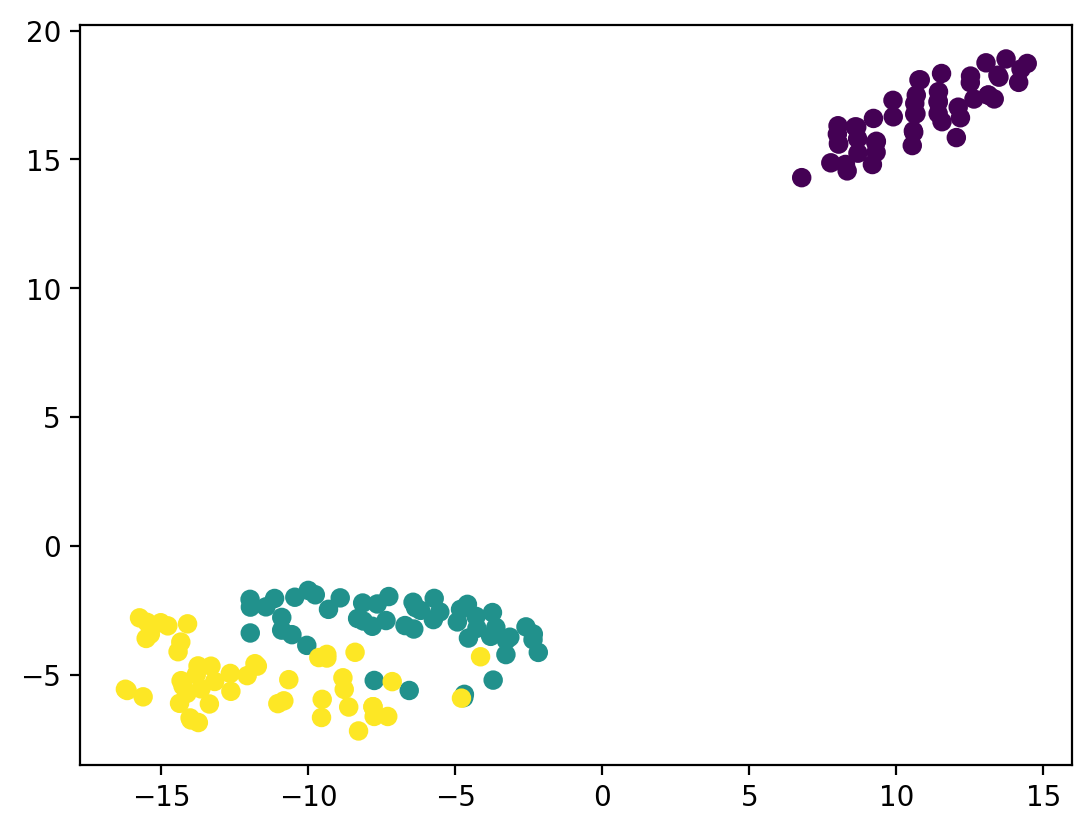

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', perplexity=30,learning_rate='auto',)
tsne.fit(X)
iristsne = tsne.fit_transform(X)

plt.scatter(iristsne[:,0], iristsne[:,1], c=iris.target);


/home/rribeiro/.conda/envs/compbio/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/rribeiro/.conda/envs/compbio/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


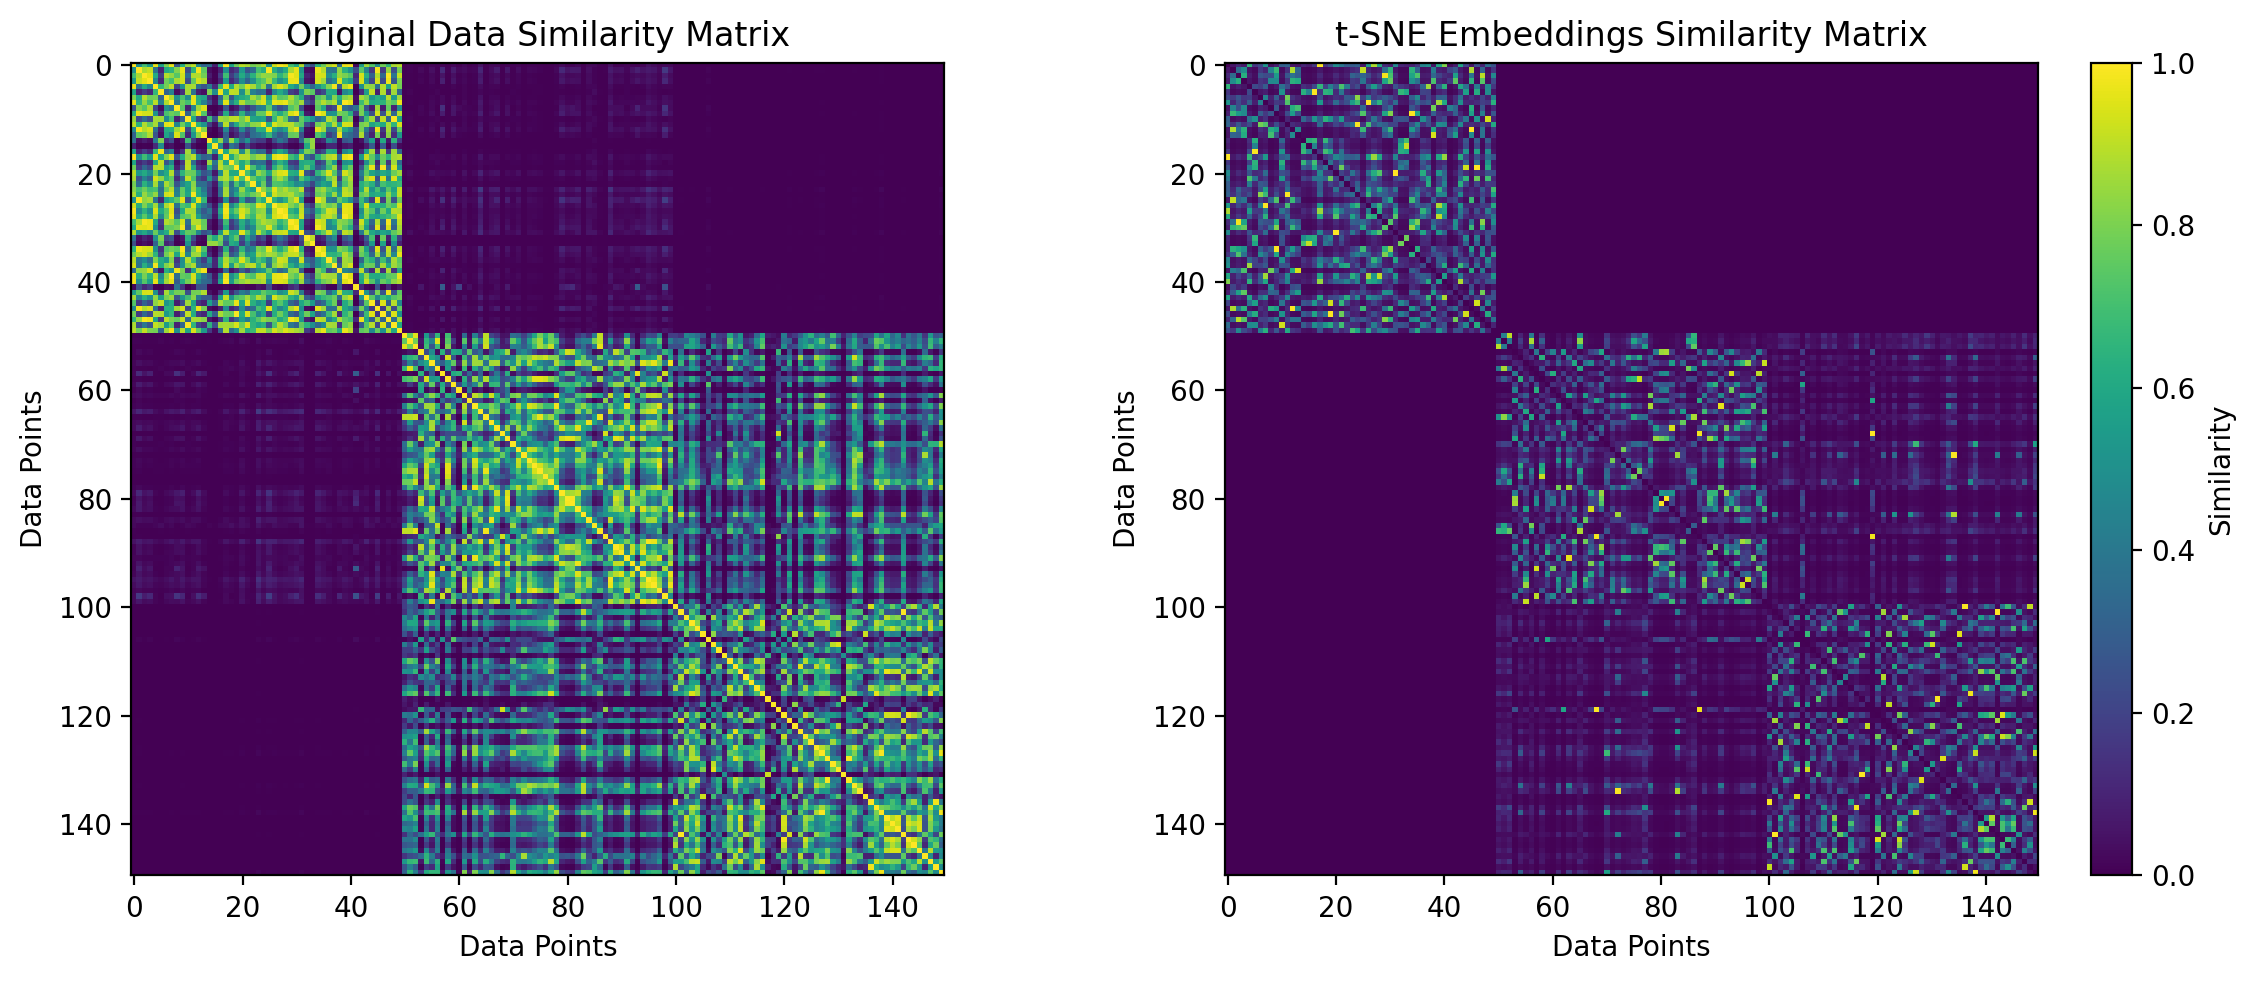

In [27]:
def gaussian_kernel(X, sigma):
    """
    Compute the Gaussian kernel matrix for the given data.

    Parameters:
    - X: Input data matrix with shape (n_samples, n_features).
    - sigma: Bandwidth parameter for the Gaussian kernel.

    Returns:
    - similarities: Similarity matrix computed using the Gaussian kernel.
    """
    distances_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
    similarities = np.exp(-distances_sq / (2 * sigma ** 2))
    return similarities

def student_kernel(X, sigma):
    """
    Compute the Student's t-distribution kernel matrix for the given data.

    Parameters:
    - X: Input data matrix with shape (n_samples, n_features).
    - sigma: Bandwidth parameter for the kernel.

    Returns:
    - similarities: Similarity matrix computed using the Student's t-distribution kernel.
    """
    distances_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
    similarities = 1 / (1 + distances_sq / sigma ** 2)
    np.fill_diagonal(similarities, 0)  # Set diagonal elements to 0
    return similarities
# Sample data

# Fit t-SNE to the data
tsne = TSNE(n_components=2, init='pca')
X_embedded = tsne.fit_transform(X)

# Compute similarity matrices
sigma = 1.0  # Bandwidth parameter for the kernel
similarities_original = gaussian_kernel(X, sigma)
similarities_tsne = student_kernel(X_embedded, sigma)

# Plot the matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data similarity matrix
axes[0].imshow(similarities_original, cmap='viridis')
axes[0].set_title('Original Data Similarity Matrix')
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Data Points')

# t-SNE embeddings similarity matrix
im1 = axes[1].imshow(similarities_tsne, cmap='viridis')
axes[1].set_title('t-SNE Embeddings Similarity Matrix')
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Data Points')

plt.colorbar(im1, ax=axes[1], label='Similarity')
plt.tight_layout()
plt.show()


## t-SME hyperparameters really matter

### How _perplexity_ influence sthe resutls?

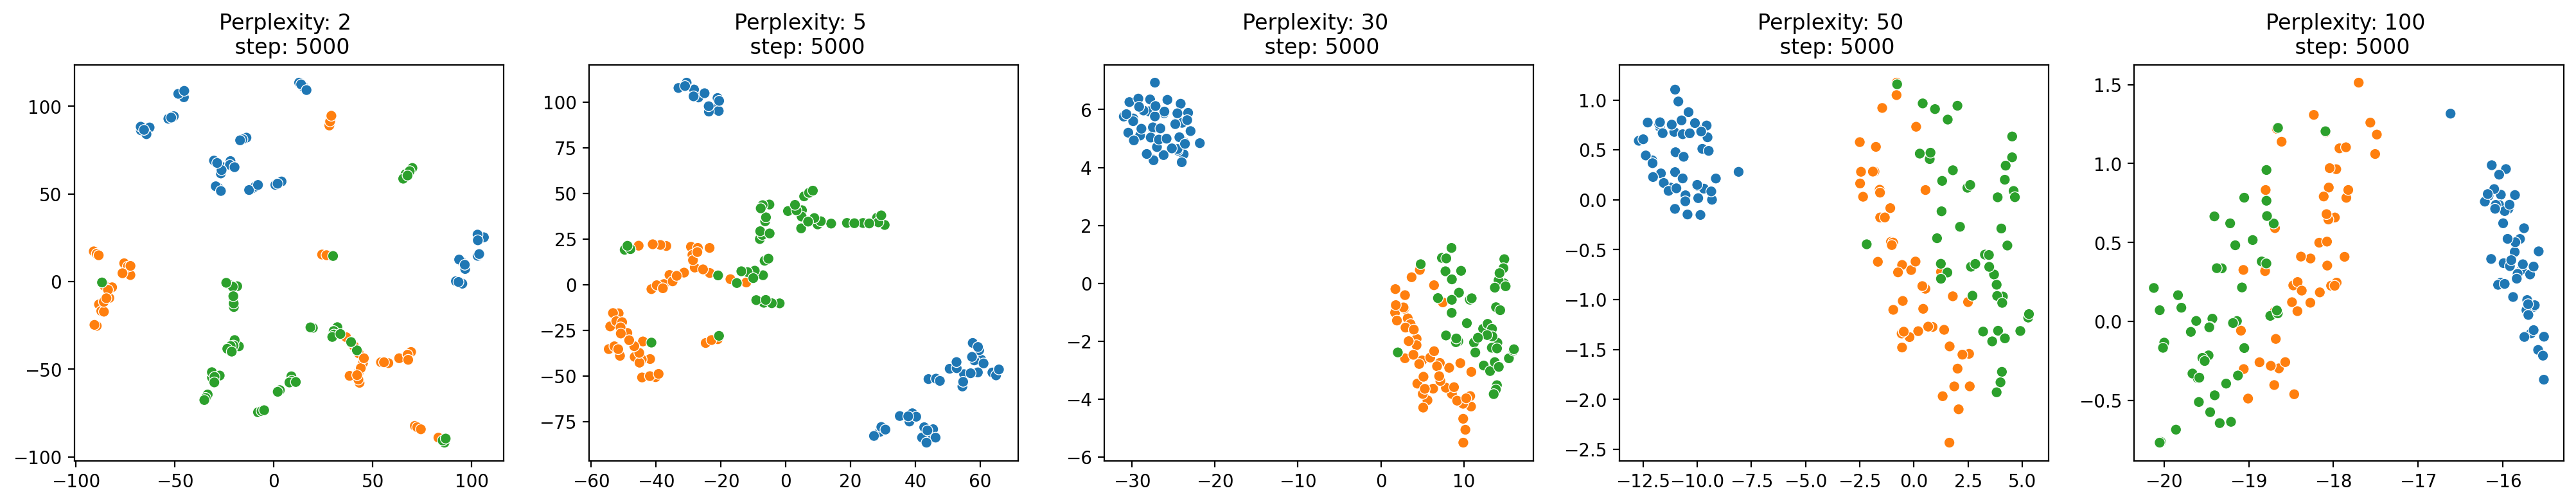

In [28]:
def run_tsne(data,perplexity, step):
    tsne = TSNE(n_components=2, init='random', perplexity=perplexity,learning_rate='auto', n_iter=step)
    tsne_results = tsne.fit_transform(data)
    return tsne_results
    
tsne1 = run_tsne(X,2, 5000)
tsne2 = run_tsne(X,5, 5000)
tsne3 = run_tsne(X,30, 5000)
tsne4 = run_tsne(X,50, 5000)
tsne5 = run_tsne(X,100, 5000)

fig, ax = plt.subplots(1,5, figsize=[25,4])

sns.scatterplot(x=tsne1[:,0], y=tsne1[:,1], hue=iris_df.species, ax=ax[0], palette='tab10',legend=False);
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1], hue=iris_df.species, ax=ax[1], palette='tab10',legend=False);
sns.scatterplot(x=tsne3[:,0], y=tsne3[:,1], hue=iris_df.species, ax=ax[2], palette='tab10',legend=False);
sns.scatterplot(x=tsne4[:,0], y=tsne4[:,1], hue=iris_df.species, ax=ax[3], palette='tab10',legend=False);
sns.scatterplot(x=tsne5[:,0], y=tsne5[:,1], hue=iris_df.species, ax=ax[4], palette='tab10',legend=False);

ax[0].set_title('Perplexity: 2 \n step: 5000')
ax[1].set_title('Perplexity: 5 \n step: 5000')
ax[2].set_title('Perplexity: 30 \n step: 5000')
ax[3].set_title('Perplexity: 50 \n step: 5000')
ax[4].set_title('Perplexity: 100 \n step: 5000')

plt.show()

### How the the number of steps influence the results?

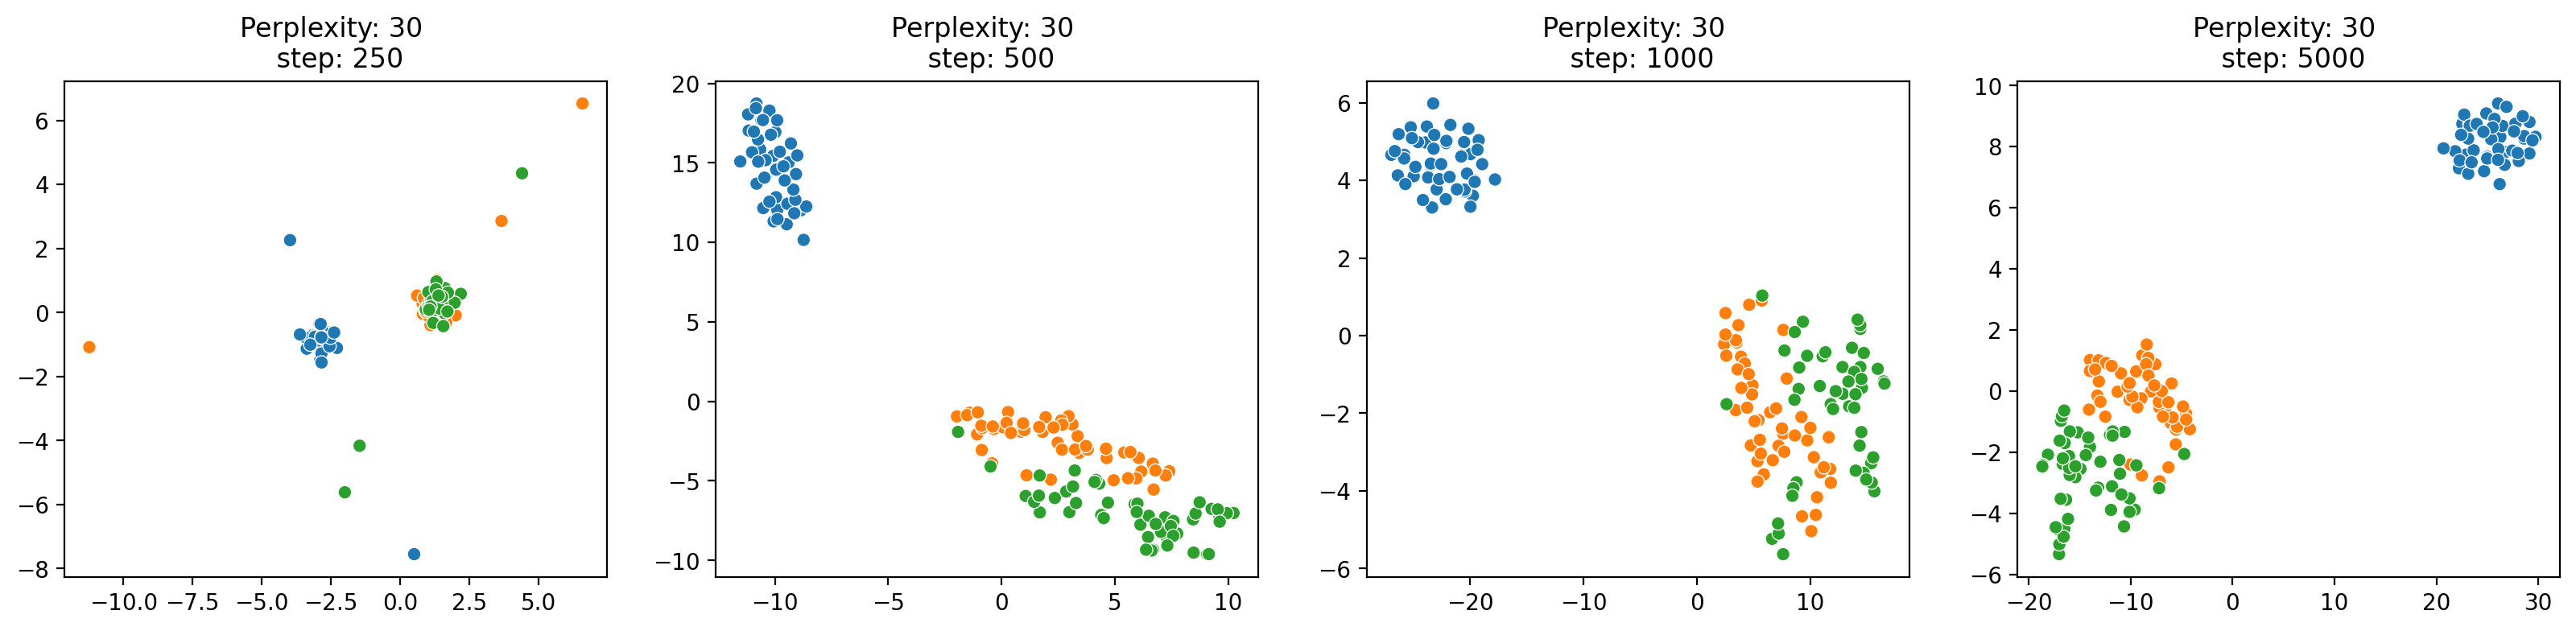

In [29]:
tsne1 = run_tsne(X,30, 250)
tsne2 = run_tsne(X,30, 500)
tsne3 = run_tsne(X,30, 1000)
tsne4 = run_tsne(X,30, 5000)

fig, ax = plt.subplots(1,4, figsize=[20,4])

sns.scatterplot(x=tsne1[:,0], y=tsne1[:,1], hue=iris_df.species, ax=ax[0], palette='tab10',legend=False);
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1], hue=iris_df.species, ax=ax[1], palette='tab10',legend=False);
sns.scatterplot(x=tsne3[:,0], y=tsne3[:,1], hue=iris_df.species, ax=ax[2], palette='tab10',legend=False);
sns.scatterplot(x=tsne4[:,0], y=tsne4[:,1], hue=iris_df.species, ax=ax[3], palette='tab10',legend=False);

ax[0].set_title('Perplexity: 30 \n step: 250')
ax[1].set_title('Perplexity: 30 \n step: 500')
ax[2].set_title('Perplexity: 30 \n step: 1000')
ax[3].set_title('Perplexity: 30 \n step: 5000')

plt.show()

### t-SNE is not deterministic

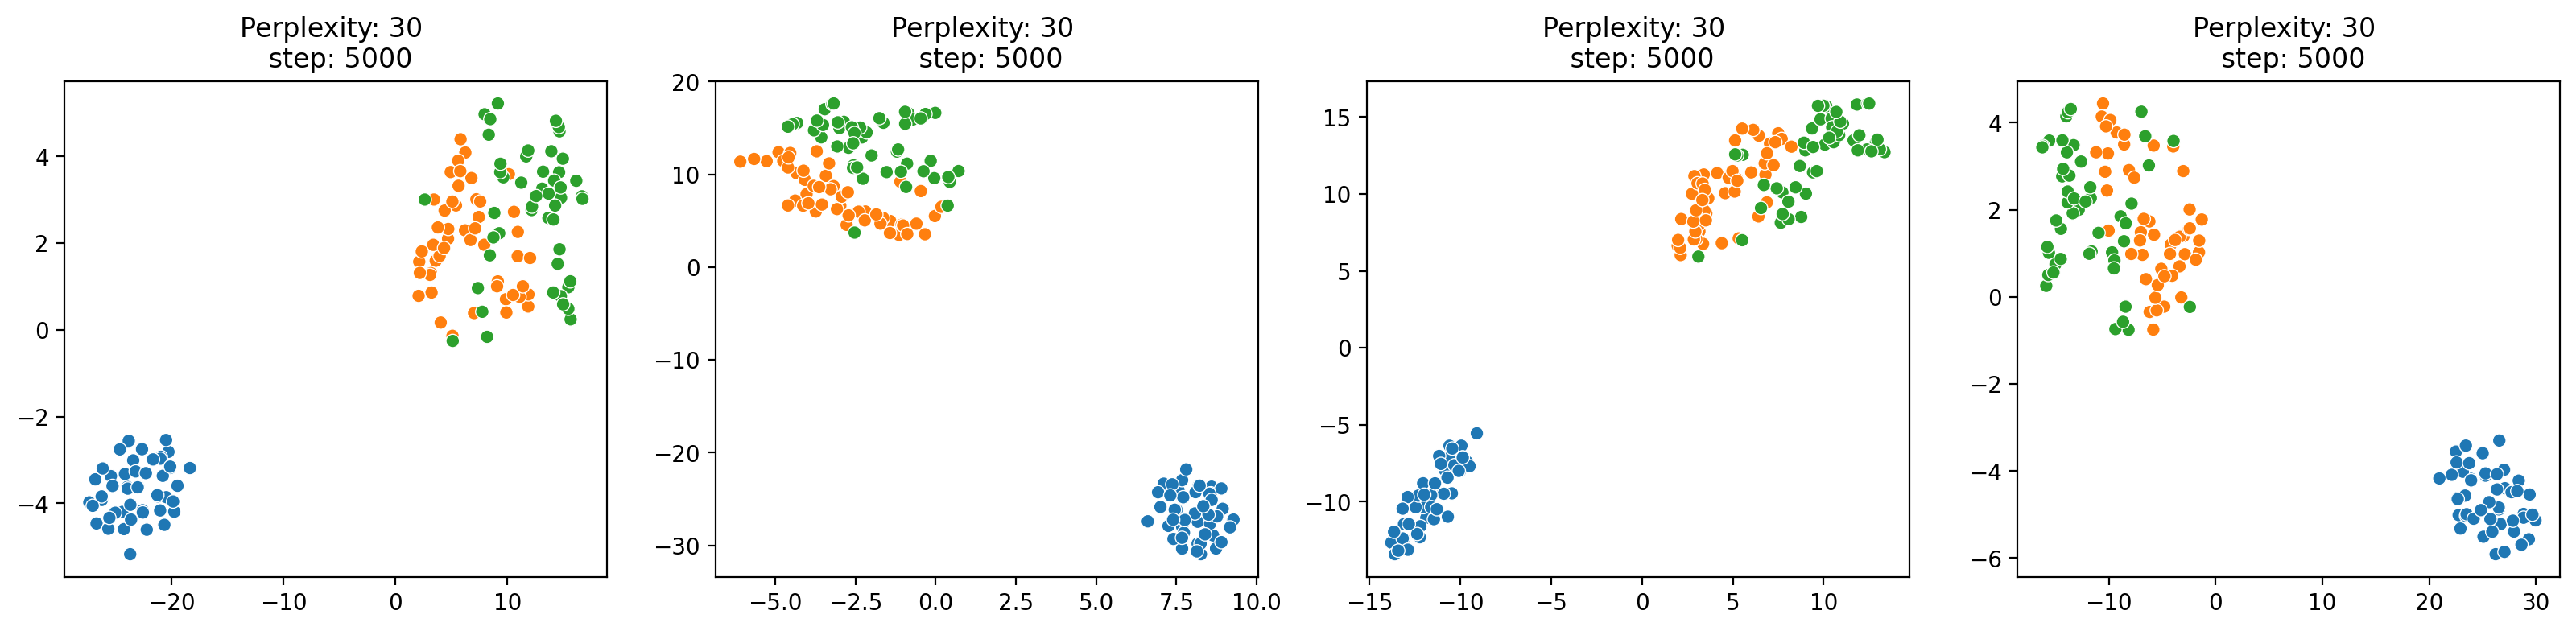

In [30]:
tsne1 = run_tsne(X,30, 5000)
tsne2 = run_tsne(X,30, 5000)
tsne3 = run_tsne(X,30, 5000)
tsne4 = run_tsne(X,30, 5000)

fig, ax = plt.subplots(1,4, figsize=[20,4])

sns.scatterplot(x=tsne1[:,0], y=tsne1[:,1], hue=iris_df.species, ax=ax[0], palette='tab10',legend=False);
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1], hue=iris_df.species, ax=ax[1], palette='tab10',legend=False);
sns.scatterplot(x=tsne3[:,0], y=tsne3[:,1], hue=iris_df.species, ax=ax[2], palette='tab10',legend=False);
sns.scatterplot(x=tsne4[:,0], y=tsne4[:,1], hue=iris_df.species, ax=ax[3], palette='tab10',legend=False);

ax[0].set_title('Perplexity: 30 \n step: 5000')
ax[1].set_title('Perplexity: 30 \n step: 5000')
ax[2].set_title('Perplexity: 30 \n step: 5000')
ax[3].set_title('Perplexity: 30 \n step: 5000')

plt.show()

# PCA vs. LDA vs. t-SNE

Text(0.5, 1.0, 't-SNE')

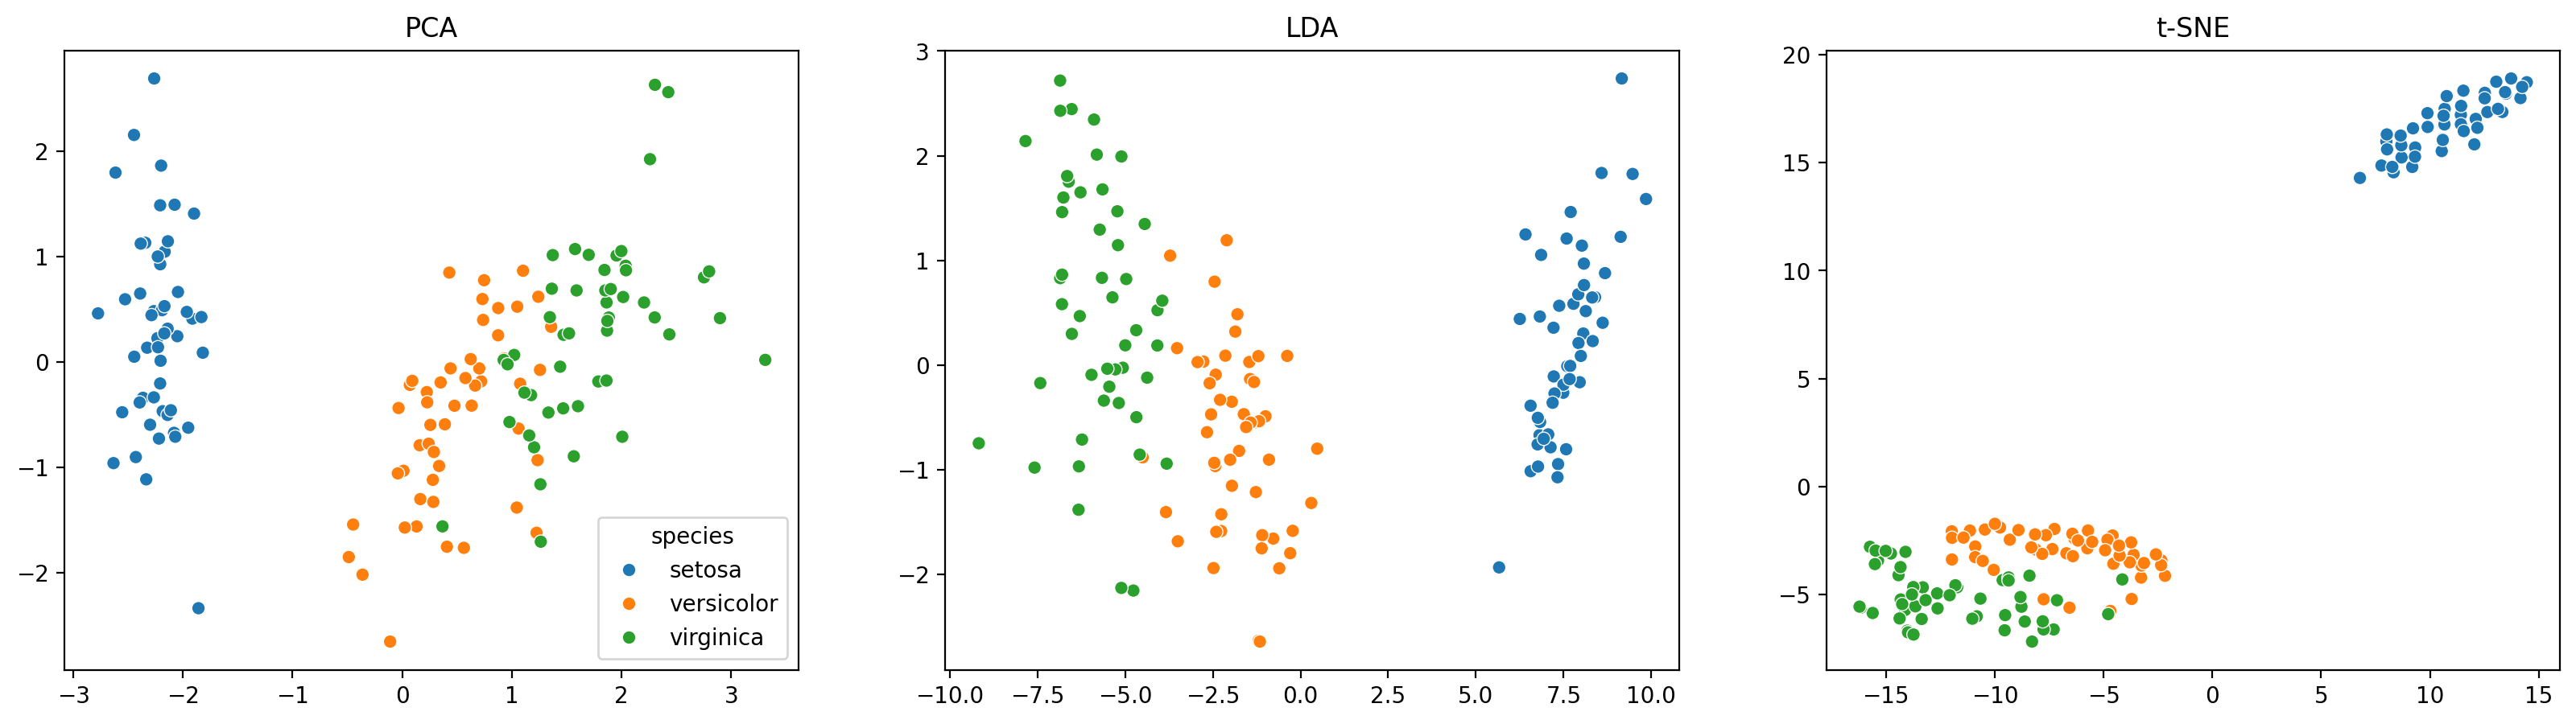

In [31]:
fig, ax = plt.subplots(1,3, figsize=[20,5])

sns.scatterplot(x=iris_pca[:,0],y=iris_pca[:,1], hue=iris_df.species, palette='tab10', ax=ax[0])
sns.scatterplot(x=irislda[:,0],y=irislda[:,1], hue=iris_df.species, palette='tab10', ax=ax[1], legend=False)
sns.scatterplot(x=iristsne[:,0],y=iristsne[:,1], hue=iris_df.species, palette='tab10', ax=ax[2], legend=False)


ax[0].set_title('PCA')
ax[1].set_title('LDA')
ax[2].set_title('t-SNE')
